# Analysis of Heart Rate Variability

## 1. Background

This dataset we are using to analyze Heart Rate Variability (HRV) comes from the SWELL knowledge dataset on stress and user modeling found here: http://cs.ru.nl/~skoldijk/SWELL-KW/Dataset.html. The dataset contains facial recognition and posture analysis, but for the purposes of this analysis we will just dig into the heart variability aspect. 

HRV is a physiological phenomenom in which the time period between heart beats has been shown to vary. To obtain HRV the interval between the "R" waves in the QRS complex are measured between successive heartbeats. It has been shown that increased variability is associated with greater health. Specifically, it has been shown as an indicator of increased emotional stress (http://tinyurl.com/y4x953x4), increase anxiety (http://tinyurl.com/y3fggcah), and possibly an indicator of Post-traumatic stress disorder (PTSD) (https://www.biologicalpsychiatryjournal.com/article/S0006-3223(97)00475-7/fulltext). Overall HRV is a way to possibly non-invasively monitor physiological stress. 

## 2. Procedure

Participants did not smoke or drink caffeine 3 hours prior to the experiment. The experiment was divided into three sections each lasting about an hour and each starting with a relaxation phase of about eight minutes. Once the relaxation phase was completed participants were assigned random tasks and told to write reports on them. During each segment participants were given an informational and a opinion report. They then made a presentation on the one of their choosing. The phases consisted of neutral - the participant was told they could work on the task as long as they wanted, stressor: time pressure - time to finish tasks was cut down by 2/3 of the previous time period, stressor: interruptions - 8 emails were sent to the particpants while they performed tasks, and some of them required replies while others didn't. The participants were instructed that it was important to finish the tasks in order to obtain the full particpation fee, which helped to set real world expectations. The participants were students comprised of 17 males and 8 females. Various measurements were obtained, but for the purposes of this dataset we will focus on the ECG data  which provides the heart rate and heart rate variability measurements. 

## 3. Hypothesis

Metric
1. The overall experimentation metric we will be tracking is HRV measured and we will be interested in if HRV decreases with the introduction of 1) time-stress and 2) interruptions

Course of action
2. If we find there is correlation between decreased HRV we will run the experiment again over the course of a couple days to see changes 

3. We believe that HRV as measured by RMSSD will decrease under stress from time iterruption and compression because HRV appears to be an indicator of physiological stress on the autonomic nervous system.

explain how things are related one goes up one goes down: the thing I defined will impact

4. The population of the study will be 25 participants (all students 17 male, 8 female). 

5. MDE: 
-a little bit of a guess 
significance is false positive rate
power is 
detection rate: increase false
power increase false positive rate good trade-off
alpha = 0.05 (false positive rate)

6. 




In [1]:
#import necessary libraries

import os
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
import matplotlib.dates as mdates
from scipy.stats import ttest_ind
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline

## Pre-processing

In [2]:
files = glob.glob(os.path.join(os.getcwd(),'data') + '/*.xlsx') #find all files with .csv
files

['/Users/patrickcullinane/Documents/Code/hrv_analysis/data/hrv stress labels.xlsx']

In [3]:
data = pd.ExcelFile(files[0]); data

In [4]:
#the data is in sheets - unpack all the sheets and append them in a for loop

for sheet in data.sheet_names:
    if sheet == 'p1':
        data_df = pd.read_excel(files[0], sheet_name=sheet)
        print('sheet: ' + str(sheet))
    else:
        df = pd.read_excel(files[0], sheet_name=sheet)
        print('sheet: ' + str(sheet))
        data_df = data_df.append(df, ignore_index=True) 

sheet: p1
sheet: p2
sheet: p3
sheet: p4
sheet: p5
sheet: p6
sheet: p7
sheet: p8
sheet: p9
sheet: p10
sheet: p11
sheet: p12
sheet: p13
sheet: p14
sheet: p15
sheet: p16
sheet: p17
sheet: p18
sheet: p19
sheet: p20
sheet: p21
sheet: p22
sheet: p23
sheet: p24
sheet: p25


In [5]:
#look at the data
data_df.head()

,Unnamed: 0,PP,C,timestamp,HR,RMSSD,SCL,date,subject,label,Condition,ElapsedTime
0,0,PP1,1,20120918T131600000,NaN,NaN,80.239727,2012-09-18 13:16:00,p1,rest,R,0
1,1,PP1,1,20120918T131700000,61.0,0.061420,77.365127,2012-09-18 13:17:00,p1,rest,R,1
2,2,PP1,1,20120918T131800000,64.0,0.049663,77.359559,2012-09-18 13:18:00,p1,rest,R,2
3,3,PP1,1,20120918T131900000,60.0,0.052487,76.728772,2012-09-18 13:19:00,p1,rest,R,3
4,4,PP1,1,20120918T132000000,61.0,0.051189,76.512877,2012-09-18 13:20:00,p1,rest,R,4


In [6]:
#there are 25 subjects in the dataset
data_df.subject.unique()

array(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20',
       'p21', 'p22', 'p23', 'p24', 'p25'], dtype=object)

The data shows 25 subjects labeled 'p1' to 'p25'

In [7]:
data_df.describe()

,Unnamed: 0,C,HR,RMSSD,SCL,ElapsedTime
count,3140.000000,3140.000000,1490.000000,1490.000000,2578.000000,3140.000000
mean,1569.500000,1.936624,73.610738,0.053412,228.847439,84.128662
std,906.584249,0.826910,8.106421,0.030615,206.416736,51.777220
min,0.000000,1.000000,57.000000,0.010599,53.252680,-117.000000
25%,784.750000,1.000000,68.000000,0.034351,108.196018,35.000000
50%,1569.500000,2.000000,73.000000,0.045700,166.184056,86.000000
75%,2354.250000,3.000000,79.000000,0.062347,256.309943,132.000000
max,3139.000000,3.000000,107.000000,0.352978,1455.230430,181.000000


The dataset contains 

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 12 columns):
Unnamed: 0     3140 non-null int64
PP             3140 non-null object
C              3140 non-null int64
timestamp      3140 non-null object
HR             1490 non-null float64
RMSSD          1490 non-null float64
SCL            2578 non-null float64
date           3140 non-null datetime64[ns]
subject        3140 non-null object
label          3140 non-null object
Condition      3140 non-null object
ElapsedTime    3140 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 294.5+ KB


In [9]:
#print out phase of study
print(data_df.label.unique())
print(data_df.Condition.unique())

['rest' 'no stress' 'time pressure' 'interruption']
['R' 'N' 'T' 'I']


Each phase of the study is labeled 'R' 'N' 'T' 'I'. corresponding to rest, no-stress, time pressure, or iterruption as described previously.

Below are the mean heart rates and root mean square of successive differences (RMSSD). This is often used as a good 'snapshot' of autonomic nervous system's parasympathetic branch. In other words RMSSD can be used as a marker for parasympathetic activity/stress on the body. 

Let's look at the average heart rates and HRV values for each of the participants during the study.

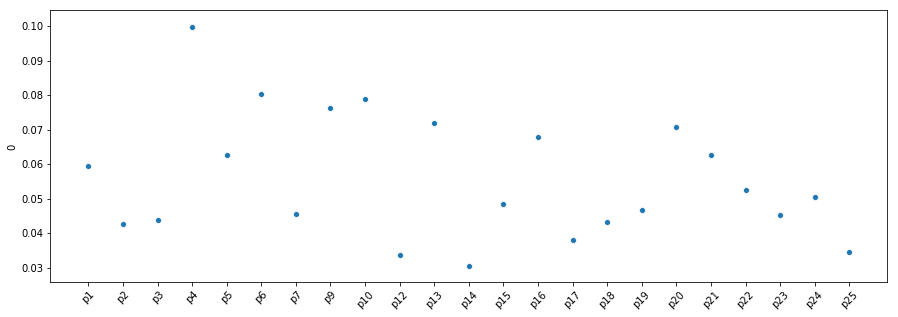

In [10]:
#calculate and graph all the RMSSD means
rmssd_hr = []

for sheet in data.sheet_names:
    hr = data_df[data_df['subject']==sheet]
    rmssd_hr.append(hr['RMSSD'].mean())
    
rmssd_hr_df = pd.DataFrame(rmssd_hr,data.sheet_names)

fig, ax = plt.subplots(figsize=(15,5))

sns.scatterplot(x=rmssd_hr_df.index, y=rmssd_hr_df[0],data=rmssd_hr_df)
plt.xticks(rotation=45)

plt.show()

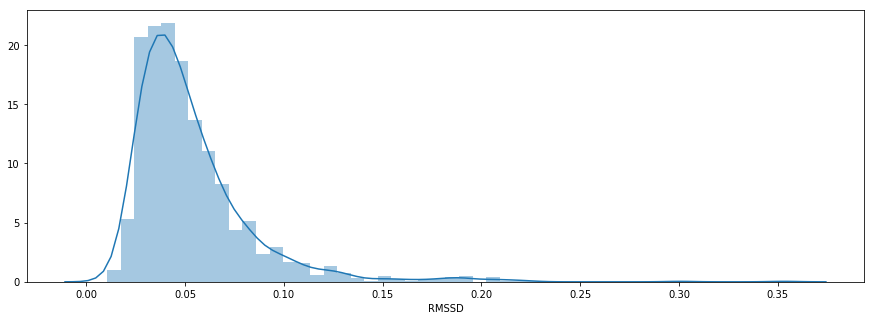

In [12]:
#visualize the distribution off all the RMSSD values
fig, ax = plt.subplots(figsize=(15,5))

sns.distplot(data_df['RMSSD'].dropna())
plt.show()

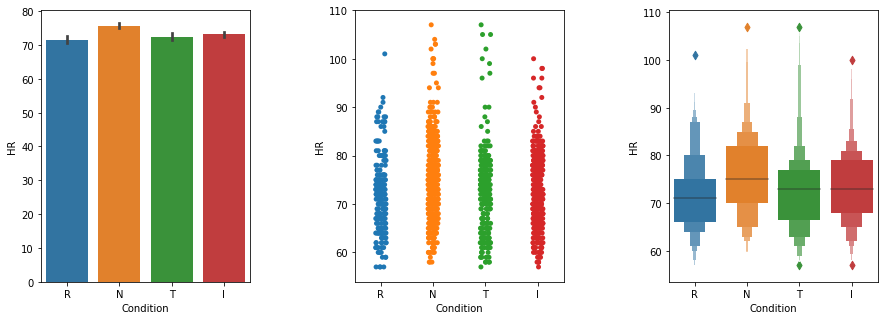

In [13]:
#by phase of study return HR for all subjects
fig, ax = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
fig.subplots_adjust(wspace=.5)

sns.barplot(x=data_df['Condition'], y=data_df['HR'], ax=ax[0])
sns.stripplot(x=data_df['Condition'], y=data_df['HR'], ax=ax[1])
sns.boxenplot(x=data_df['Condition'], y=data_df['HR'], ax=ax[2])

plt.show()

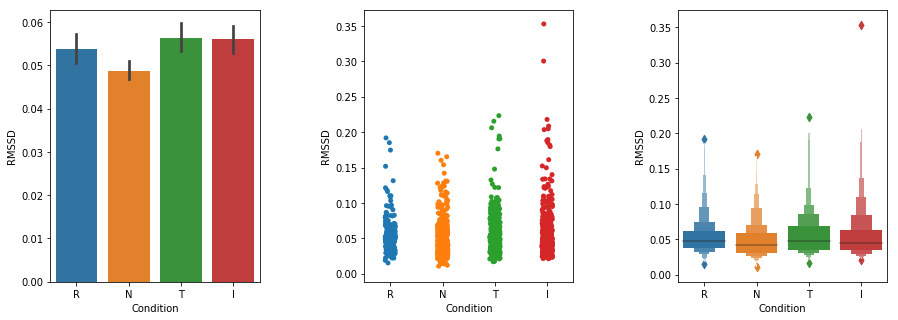

In [14]:
#by phase of study return RMSSD for all subjects
fig, ax = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
fig.subplots_adjust(wspace=.5)

sns.barplot(x=data_df['Condition'], y=data_df['RMSSD'], ax=ax[0])
sns.stripplot(x=data_df['Condition'], y=data_df['RMSSD'], ax=ax[1])
sns.boxenplot(x=data_df['Condition'], y=data_df['RMSSD'], ax=ax[2])

plt.show()

In [36]:
#collect study means
#by particpant/hue=condition, y axis = rMSSD

SUBJECTS = data.sheet_names
CONDITIONS = data_df.Condition.unique()

def calculate_mean_rmssd(condition,subject):
    return data_df[(data_df.Condition==condition) & (data_df.subject==subject)].RMSSD.mean()

#def calculate_mean_hr(condition,subject):
    #return data_df[(data_df.Condition==condition) & (data_df.subject==subject)].HR.mean()

def generate_means(conditions,subjects):
    output={}
    
    for subject in subjects:
        m = tuple(calculate_mean(condition,subject) for condition in conditions)
        output[subject] = m
    
    return output

def generate_scatter(value,value_range):
    [plt.scatter(SUBJECTS, [elem[i] for elem in value.values()]) for i in range(value_range)]
    plt.show()
    

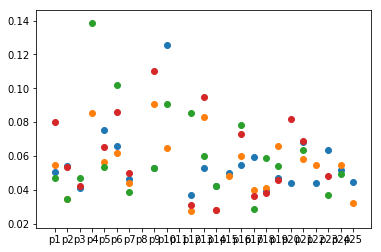

In [38]:
rmssd_means = generate_means(CONDITIONS,SUBJECTS)

generate_scatter(rmssd_means,4)


To do:

1. By subject breakdown can I fit in 
2. ttest to show significant difference between RMSSD in no stress v. time pressue & no stree v. interruption. I think I am looking for a decreased RMSSD in this case: This is my A/B test
3. Run a for-loop to see if I can parse out ttest on a subject by subject basis
4. A linear regression example? HR v. RMSSD, SCL v. RMSSD
5. Can I run a pairplot with all the subjects RMSSD & HR data to see if there are correlations between eachother? 
6. Figure out mean/median SD for all subjects in the study for HR/RMSSD - then can I look 